# llc4320 spectra in the North Pacific Subtropical Counter Current

In [9]:
from __future__ import print_function
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

sys.path.insert(0, '../')
import STCC_map as Smap

#from pyspec import spectrum as spec
#import pyspec.spectrum as spec
#reload(spec)

#import spectrum as spec

In [2]:
llc4320map = Smap.map()

In [10]:
xg_subregion = np.hstack([135.,160.,160.,135,135.])
yg_subregion = np.hstack([18.,18.,28.,28.,18.])

xg_subregion, yg_subregion = llc4320map.m(xg_subregion,yg_subregion)

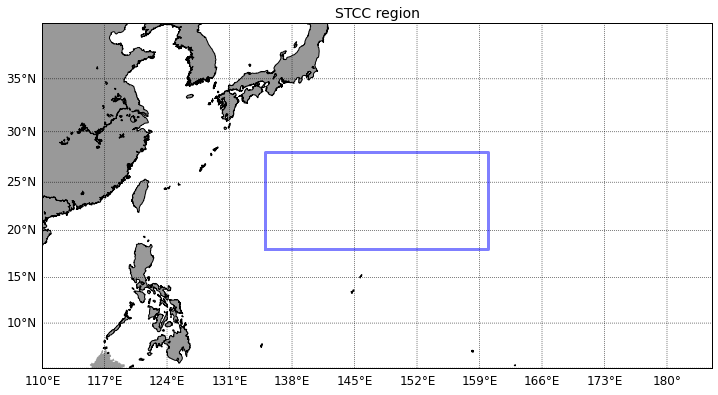

In [11]:
fig = plt.figure(facecolor='w', figsize=(12.,8.5))

llc4320map.m.fillcontinents(color='.60',lake_color='none')
llc4320map.draw_par_mer()
llc4320map.m.drawcoastlines()

llc4320map.m.plot(xg_subregion,yg_subregion,'b',linewidth=3.,alpha=.5)

plt.title('STCC region')

# Onedimensional spectra

In [12]:
def set_spec_axis(var='eta',dir='zonal'):
    plt.xlabel(dir+' wavenumber [cpkm]')
    if var == 'eta':
        plt.ylabel(r'SSH variance density [m$^2$/cpkm]')                
        plt.xlim(1.e-3,1./6.)
        plt.ylim(1.e-9,1.e0)
    elif var == 'ke':
        plt.ylabel(r'KE spectral density [m$^2$/cpkm]')    
        plt.xlim(1.e-3,1./6.)
        plt.ylim(1.e-6,1.e0)
    
def plt_spec_slopes(kmin=1./500,kmax=1./10,power=-11/3.,
                    scaling=1.e-12,xtext=1./200.,ytext=1./10.,text=r'-11/3'):
    
    k = np.array([kmin,kmax])
    plt.loglog(k,scaling*(k**power),'k--',linewidth=2.)
    plt.text(xtext,ytext,text,fontsize=14)
    

#  KE spectra

In [6]:
kespec_lats = np.load('uv_wavenumber_lats.npz')

In [7]:
kespec_lats.keys()

['d', 'lon', 'Eud', 'k', 'Evd', 'lat', 'Eu', 'Ev']

/Users/crocha/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


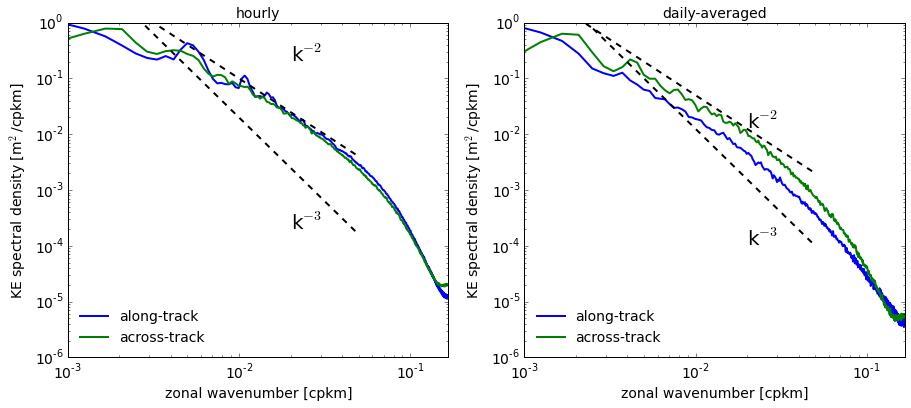

In [8]:
kr = np.array([1./500,1./20])

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.loglog(kespec_lats['k'],kespec_lats['Eu'][:,:].mean(axis=0),
          label='along-track',linewidth=2)
plt.loglog(kespec_lats['k'],kespec_lats['Ev'][:,:].mean(axis=0),
          label='across-track',linewidth=2)
plt.loglog(kr,kr**-2/1.e5,'k--',linewidth=2)
plt.loglog(kr,kr**-3/5.e7,'k--',linewidth=2)
plt.text(1./50,1./5.,r'k$^{-2}$',fontsize=20)
plt.text(1./50,2.e-4,r'k$^{-3}$',fontsize=20)
set_spec_axis(var='ke')
plt.legend(loc=3)
plt.title('hourly')

plt.subplot(122)
plt.loglog(kespec_lats['k'],kespec_lats['Eud'][:,:].mean(axis=0),
          label='along-track',linewidth=2)
plt.loglog(kespec_lats['k'],kespec_lats['Evd'][:,:].mean(axis=0),
          label='across-track',linewidth=2)
plt.loglog(kr,kr**-2/2.e5,'k--',linewidth=2)
plt.loglog(kr,kr**-3/.8e8,'k--',linewidth=2)
plt.text(1./50,1./80,r'k$^{-2}$',fontsize=20)
plt.text(1./50,1.e-4,r'k$^{-3}$',fontsize=20)
set_spec_axis(var='ke')
plt.legend(loc=3)
plt.title('daily-averaged')